In [17]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image

def plot_core_periphery_graph(G, core_indices):
    # Get the node labels (strings) from the graph using the indices
    core_nodes = [list(G.nodes)[i] for i in core_indices]
    
    # Set node color: 'red' for core nodes and 'blue' for periphery nodes
    node_colors = ['red' if node in core_nodes else 'blue' for node in G.nodes]
    
    # Draw the graph
    pos = nx.spring_layout(G)  # spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=10, font_size=0, font_color='white')
    
    # Highlight core nodes with larger size
    nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='red', node_size=30)
    plt.show()

nodes = pd.read_csv("jean-complete-node.csv")
edges = pd.read_csv("jean-complete-edge.csv")

# 무방향 그래프 생성
G = nx.Graph()

for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'], description=row['Description'])

for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], id=row['Id'], label=row['Label'])

A = nx.to_numpy_array(G)
n = A.shape[0]


/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Borgatti Everett
Best core indices (Borgatti and Everett): [0, 4, 6, 9, 12, 13, 14, 24, 25, 31, 33, 34, 35, 36, 38, 39, 44, 45, 47, 48, 55, 60, 61, 64, 78, 80, 81, 84, 88, 97, 103, 109, 111, 117, 118, 123, 124, 128, 131, 133, 139, 144, 148, 149, 150, 154, 155, 157, 158, 160, 164, 169, 175, 179, 180]
Maximum Borgatti and Everett correlation ρ: 0.12989876972380607


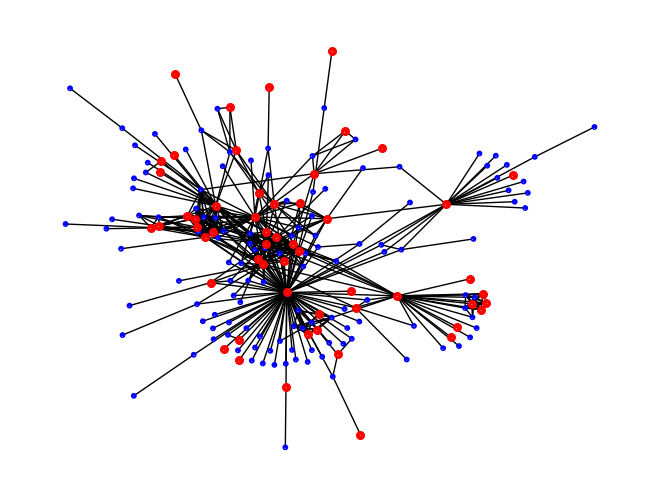

In [23]:
from algorithms.borgatti_everett import Borgatti_Everett

model = Borgatti_Everett(G, A, n)
ga_instance_borgatti = model.run_genetic_algorithm(2000)

solution_borgatti, solution_fitness_borgatti, solution_idx_borgatti = ga_instance_borgatti.best_solution()
best_core_indices_borgatti = [i for i, gene in enumerate(solution_borgatti) if gene > 0.5]
ρ = model.borgatti_everett_correlation(best_core_indices_borgatti)

print("-----------------------------")
print("*** Borgatti Everett")
print(f"Best core indices (Borgatti and Everett): {best_core_indices_borgatti}")
print(f"Maximum Borgatti and Everett correlation ρ: {ρ}")


plot_core_periphery_graph(G, best_core_indices_borgatti)

In [2]:
from core_periphery import Surprise

model = Surprise(G, A)
best_x, core_set, best_q = model.core_periphery_optimization(iterations=1)

print("Best division (0: periphery, 1: core):", core_set)
print("Best MEH value:", best_q)

plot_core_periphery_graph(G, set(core_set))


/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1359: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  l_bullet = len([edge for edge in G.edges if edge[0] in group_1 and edge[1] in group_1])
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1360: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  l_circle = len([edge for edge in G.edges if edge[0] in group_2 and edge[1] in group_2])
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1370: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if u in group_1 and v in group_1:
/Users/jeongjin/Desktop/Work/cp-explainer/core_periphery.py:1372: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif u in grou

In [13]:
import cpnet
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

alg = cpnet.Surprise(100)
alg.detect(G) # Feed the network as an input

x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

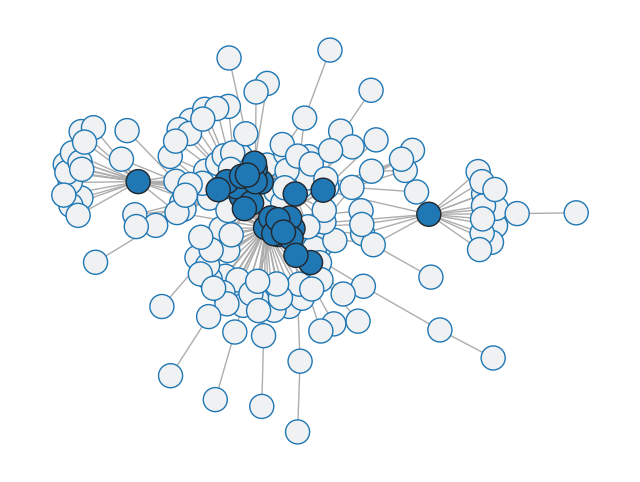

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

In [41]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, alg, significance_level=0.01, num_of_thread=1
)

/Users/jeongjin/miniconda3/lib/python3.11/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [01:49<00:00,  1.10s/it]


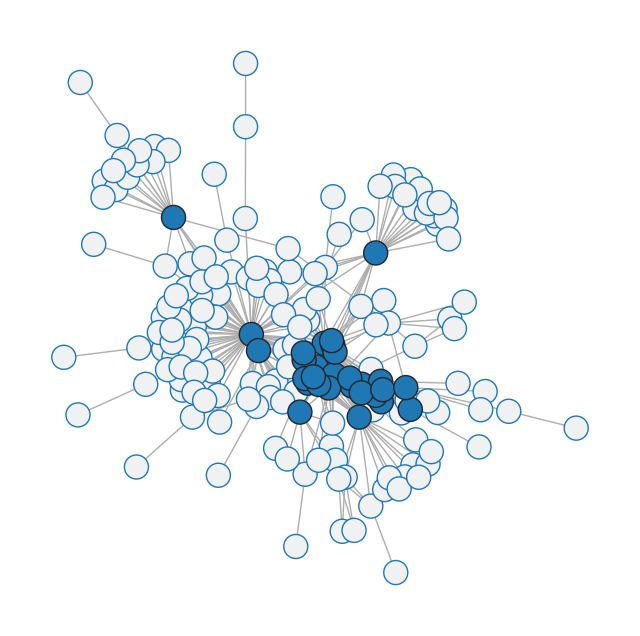

In [42]:
# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)